In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


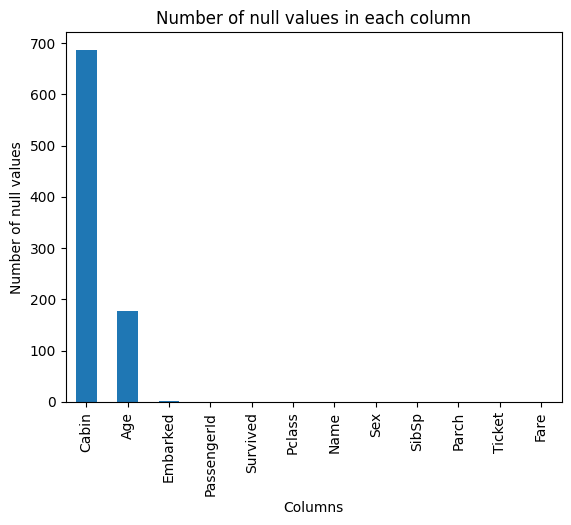

In [32]:
titanull_values = titanic.isnull().sum().sort_values(ascending=False)
print(titanull_values)
titanull_values.plot(kind='bar')
plt.title('Number of null values in each column')
plt.xlabel('Columns')
plt.ylabel('Number of null values')
plt.show()

In [33]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [34]:
titanic_eda=titanic.copy()

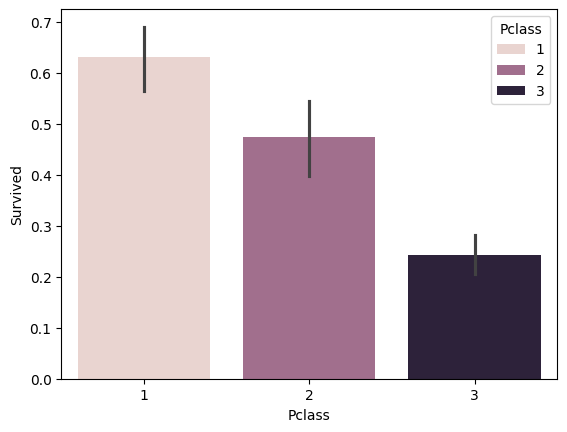

In [35]:
sns.barplot(data=titanic_eda,x='Pclass',y='Survived', hue='Pclass')
plt.show()

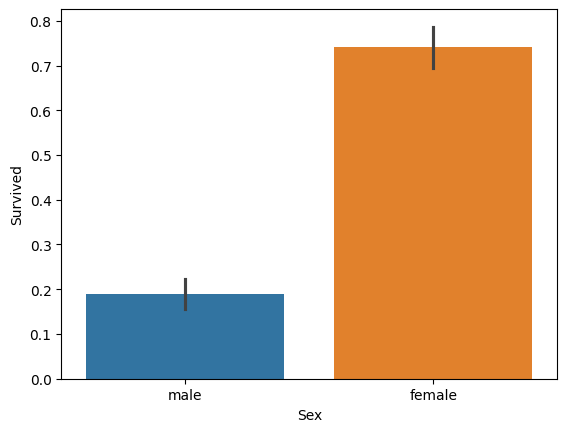

In [36]:
sns.barplot(data=titanic_eda, x='Sex', y='Survived', hue='Sex')
plt.show()

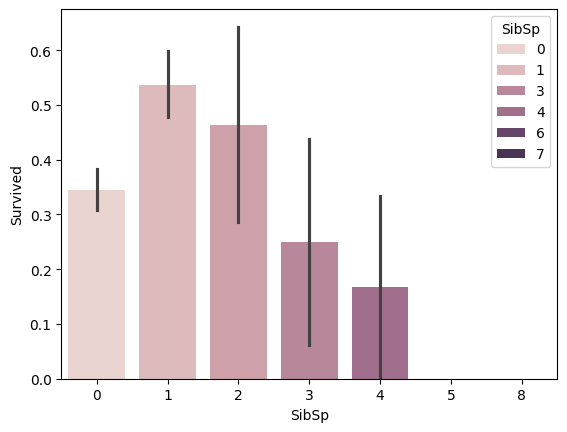

In [37]:
sns.barplot(data=titanic_eda,x='SibSp',y='Survived',hue='SibSp')
plt.show()

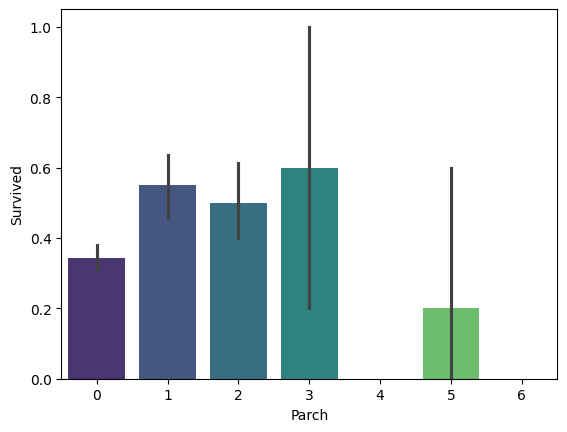

In [38]:
sns.barplot(data=titanic_eda,x='Parch',y='Survived',palette='viridis')
plt.show()

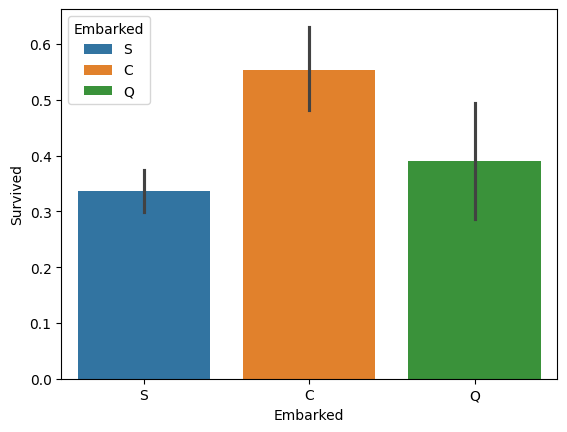

In [39]:
sns.barplot(data=titanic_eda, x='Embarked', y='Survived', hue='Embarked')
plt.show()

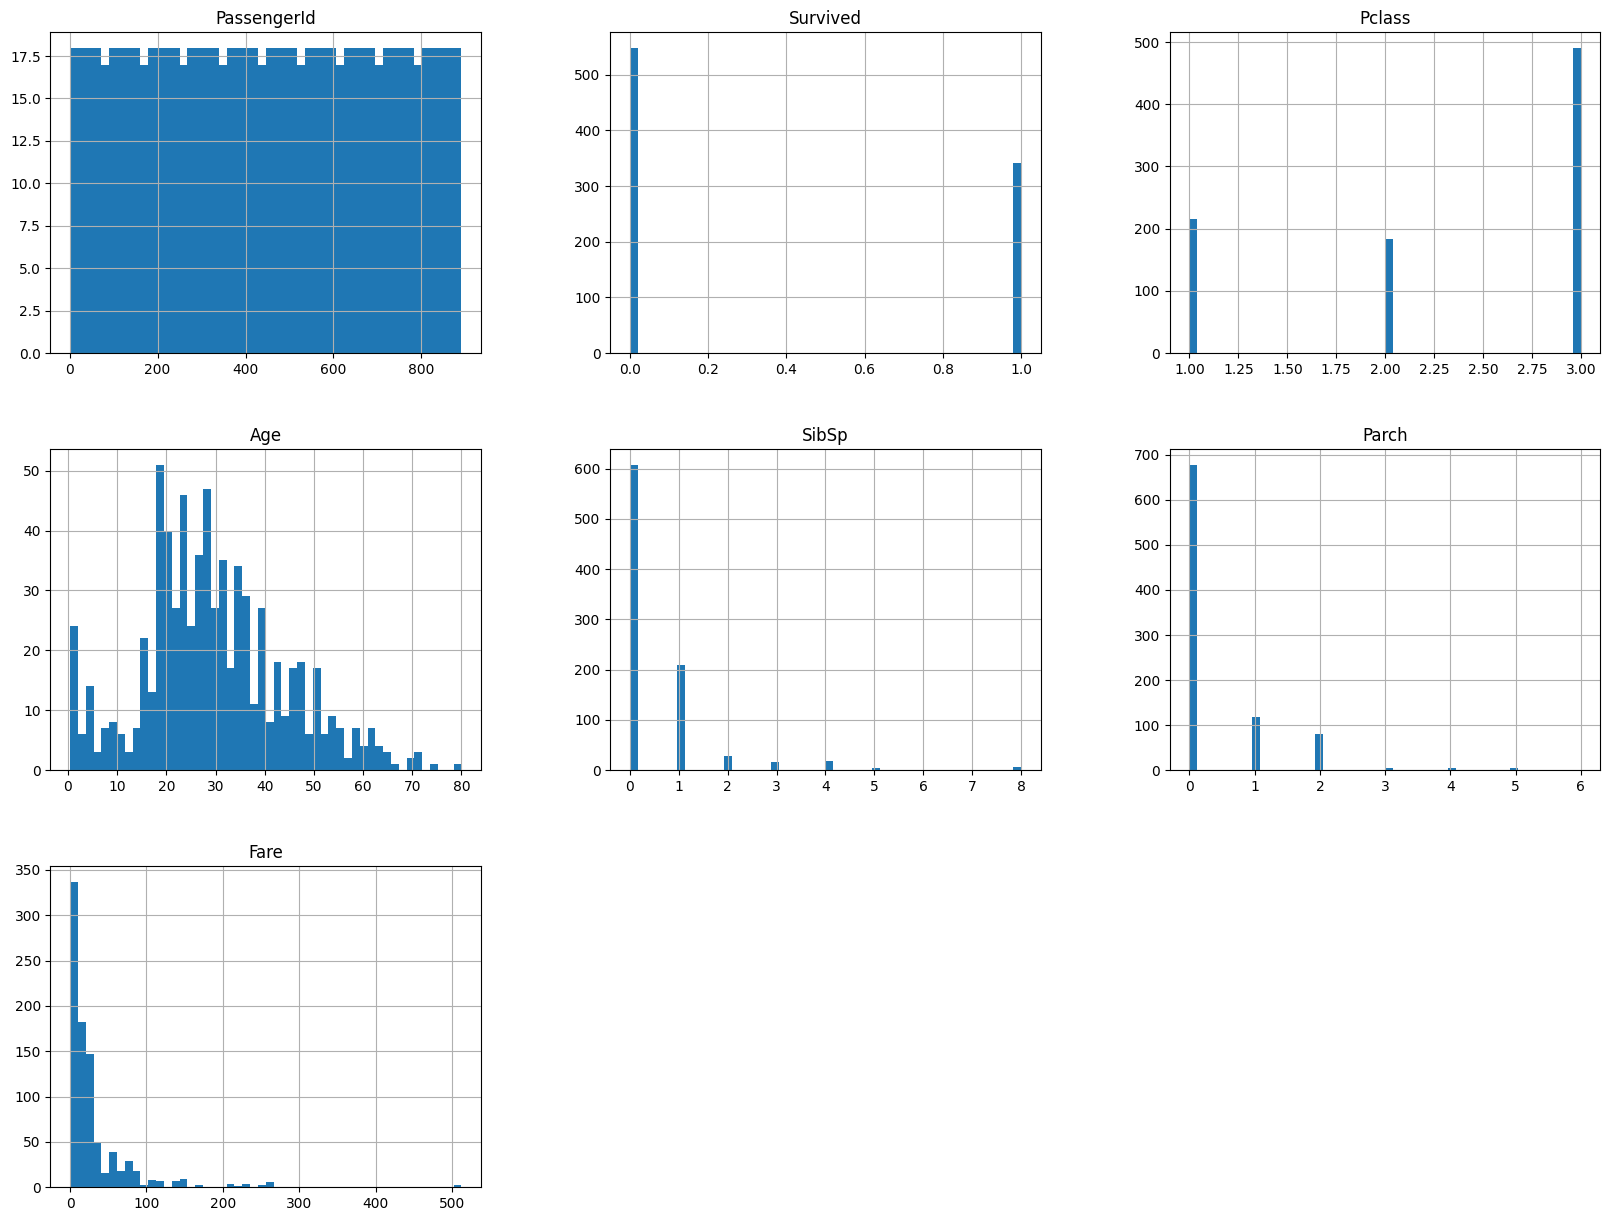

In [40]:
titanic_eda.hist(bins=50, figsize=(20, 15))
plt.show()

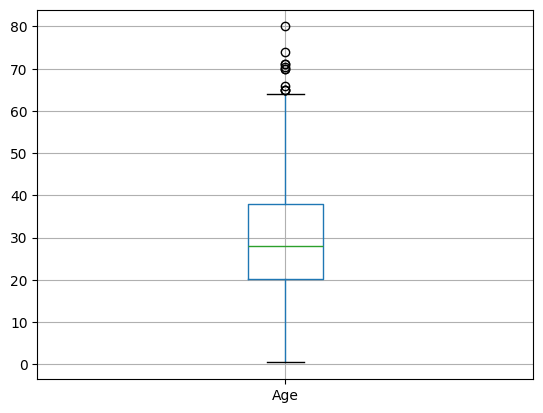

In [41]:
titanic_eda.boxplot(column='Age')
plt.show()

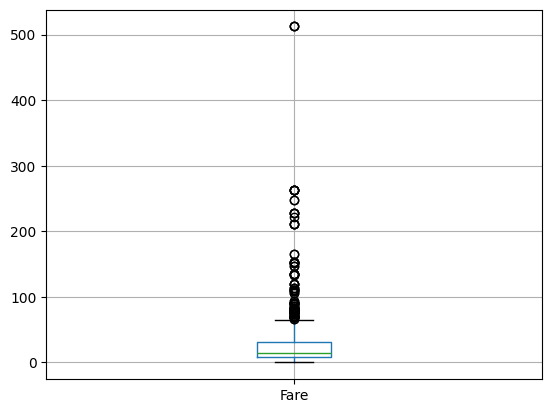

In [42]:
titanic_eda.boxplot(column='Fare')
plt.show()

In [43]:
titanic_eda['IsAlone'] = (titanic_eda['SibSp'] + titanic_eda['Parch']).apply(lambda x: 1 if x>0 else 0)
titanic_eda['Family'] = titanic_eda['SibSp'] + titanic_eda['Parch']

In [44]:
titanic_eda['Title'] = titanic_eda['Name'].str.extract(', ([A-Za-z]+)\.')
titanic_eda['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', nan, 'Jonkheer'],
      dtype=object)

Survived       1.000000
Fare           0.257307
IsAlone        0.203367
Parch          0.081629
Family         0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


<Axes: >

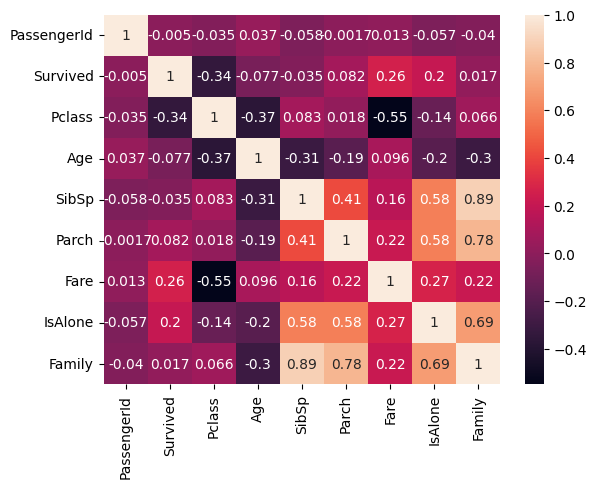

In [45]:
corr_matrix=titanic_eda.corr(numeric_only=True)
print(corr_matrix['Survived'].sort_values(ascending=False))
sns.heatmap(corr_matrix, annot=True)

In [46]:
titanic.dropna(subset=['Embarked'], inplace=True)

In [47]:
from sklearn.model_selection import train_test_split
X = titanic.drop(columns=['Survived'])
y = titanic['Survived']

In [48]:
import re
X['Title'] = X['Name'].apply(lambda x: re.search(', ([A-Za-z]+)\.', x).group(1) if re.search(', ([A-Za-z]+)\.', x) else '')
X['Title'].unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', '', 'Jonkheer'],
      dtype=object)

In [49]:
X.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Title'], inplace=True)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=titanic['Sex'], random_state=42)

In [51]:
from sklearn.base import BaseEstimator, TransformerMixin
age_ix, sibsp_ix, parch_ix, fare_ix = 0, 1, 2, 3
class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        is_Alone = X[:, sibsp_ix] + X[:, parch_ix]
        is_Alone = np.where(is_Alone > 0, 1, 0)
        is_Alone = np.log(is_Alone + 1)
        X = np.c_[X, is_Alone]
        
        X[:, age_ix] = np.log(X[:, age_ix] + 1)

        X[:, fare_ix] = np.log(X[:, fare_ix] + 1)
        
        #X = np.delete(X, [sibsp_ix, parch_ix], axis=1)
        return X

In [52]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attrib_adder', CombinedAttributeAdder()),
])

age_fare_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

full_pipeline = ColumnTransformer([
    ('num_attribs', num_pipeline, ['Age', 'SibSp', 'Parch', 'Fare']),
    ('age_fare', age_fare_pipeline, ['Age', 'Fare']),
    ('cat', cat_pipeline, ['Sex', 'Embarked'])
])

processed_X_train = full_pipeline.fit_transform(X_train)
processed_X_test = full_pipeline.transform(X_test)

In [53]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(processed_X_train, y_train)
train_pred=lr.predict(processed_X_train)
test_pred=lr.predict(processed_X_test)
print(classification_report(y_train, train_pred))
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       439
           1       0.76      0.70      0.73       272

    accuracy                           0.80       711
   macro avg       0.79      0.78      0.79       711
weighted avg       0.80      0.80      0.80       711

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.76      0.76      0.76        68

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178



In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(processed_X_train, y_train)
train_pred=rfc.predict(processed_X_train)
test_pred=rfc.predict(processed_X_test)
print(classification_report(y_train, train_pred))
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       439
           1       0.98      0.97      0.97       272

    accuracy                           0.98       711
   macro avg       0.98      0.98      0.98       711
weighted avg       0.98      0.98      0.98       711

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       110
           1       0.74      0.81      0.77        68

    accuracy                           0.82       178
   macro avg       0.81      0.82      0.81       178
weighted avg       0.82      0.82      0.82       178

